In [87]:
import numpy as np
import GPy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from random import randrange, uniform
from scipy.stats import norm
import math
import copy
import scipy

In [75]:
def init(X_total, Y_total, seed):

  np.random.seed(seed)
  
  X_sample = []
  Y_sample = []


  for i in range(3):
    x_index = int(np.random.randint(X_total.shape[0], size=1))


    X_temp = X_total[x_index]
    Y_temp = Y_total[x_index]

    X_sample.append(X_temp)
    Y_sample.append(Y_temp)

  return np.array(X_sample),np.array(Y_sample).reshape(-1,)

def findmax(mean,var,fstar):
   z = (fstar - mean)/np.sqrt(var)  
   out = norm.pdf(z)   

   return out

In [124]:
X = np.linspace(1,10,401)
exp = 0
seed = 0
print(exp)
np.random.seed(exp) 

temp = float(np.random.uniform(low=-2, high=2, size=1))
X_sample=np.array([[0]])
Y_sample=np.array([[temp]])

kernel = GPy.kern.RBF(input_dim=1,variance=10,lengthscale=1.2)
m = GPy.models.GPRegression(X_sample,Y_sample,kernel)
m.Gaussian_noise.variance.fix(0.0)

Y = m.posterior_samples_f(X.reshape(401,1),size=1)
Y = Y.reshape(401,)

fstar = np.max(Y)

X_sample = []
Y_sample = []



x_index = [0,10,200,350,400]


X_temp = X[x_index]
Y_temp = Y[x_index]

X_sample.append(X_temp)
Y_sample.append(Y_temp)
    
X_sample, Y_sample = init(X, Y, exp)
m_var = 10 
m_lengthscale = 1.2 


kernel = GPy.kern.Matern52(input_dim=1,variance=10,lengthscale=1.2)
m = GPy.models.GPRegression(X_sample.reshape(-1,1),Y_sample.reshape(-1,1),kernel)
m.Gaussian_noise.variance.fix(0.0)


#find the X that can maximize the acqusition function:
mean,var = m.predict(X.reshape(-1,1),full_cov=False)
part1_total = findmax(mean,var,fstar)
part1_total = part1_total.reshape(-1,)

part2_total = np.zeros(X.shape[0])


for i in range(X.shape[0]):
    X_sample_temp = np.concatenate((X_sample, np.array([X[i]])), axis=0)
    Y_sample_temp = np.concatenate((Y_sample, np.array([fstar])), axis=0)

    kernel_temp = GPy.kern.Matern52(input_dim=1,variance=10,lengthscale=1.2)
    m_temp = GPy.models.GPRegression(X_sample_temp.reshape(-1,1),Y_sample_temp.reshape(-1,1),kernel_temp)
    m_temp.Gaussian_noise.variance.fix(0.0)
    
    mean_temp,var_temp = m_temp.predict(X.reshape(-1,1),full_cov=True)
    mean_temp = mean_temp.reshape(-1,)
    
    num_sample =100
    count = 0
    for ii in range(num_sample):
        np.random.seed(ii) #here I fix random seed so that 
        if ii == 0:
            print(L)
            print('******************')
        L = np.linalg.cholesky(var_temp)
        Z = np.random.normal(size = 401)
        sample_temp = mean_temp+np.dot(L,Z)
        temp = any(sample_temp>fstar)+0.
        count = count+temp
    
    
    PI = count/num_sample
    PnI = 1-PI
    part2_total[i] = PnI

acq_value = part1_total*part2_total

0
[[ 2.51170642e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 2.48285639e+00  6.08369631e-02  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 2.45155270e+00  1.20155477e-01  4.57380744e-03 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [-2.17373175e-05 -1.84715747e-05 -1.14495238e-05 ...  7.48115614e-04
   0.00000000e+00  0.00000000e+00]
 [-1.06042601e-05 -9.01111323e-06 -5.58549919e-06 ...  1.09257465e-03
   4.74005033e-04  0.00000000e+00]
 [-3.06334887e-13 -2.60315504e-13 -1.61367139e-13 ...  1.54153371e-06
   5.77998457e-06  9.98178444e-05]]
******************
[[ 1.00000004e-04  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 9.88513763e-05  6.08369634e-02  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 9.76050667e-05  1.20155478e-01  4.57380745e-03 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [-1.30473327e-08 -2.78

In [129]:
part2_total

array([0.44, 0.03, 0.01, 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.04,
       0.09, 0.08, 0.2 , 0.11, 0.08, 0.07, 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.12,
       0.32, 0.25, 0.05, 0.  , 0.  , 0.  , 0.  , 0.

In [118]:
np.random.seed(1)
np.random.normal(size = 4)

array([ 1.62434536, -0.61175641, -0.52817175, -1.07296862])

In [119]:
np.random.seed(1)
np.random.normal(size = 4)

array([ 1.62434536, -0.61175641, -0.52817175, -1.07296862])

In [127]:
acq_value*100

array([1.27277258e-02, 7.35301696e-04, 2.05194872e-04, 1.69545212e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

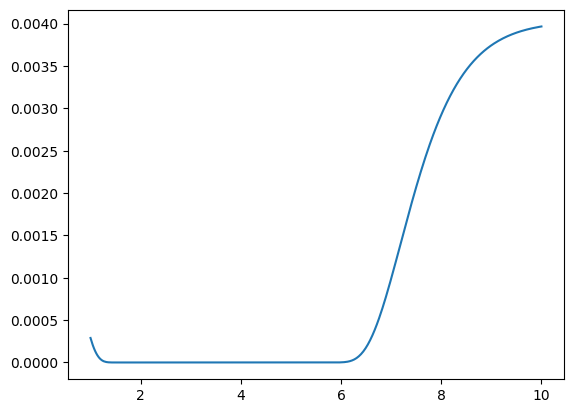

In [131]:
plt.plot(X,part1_total)

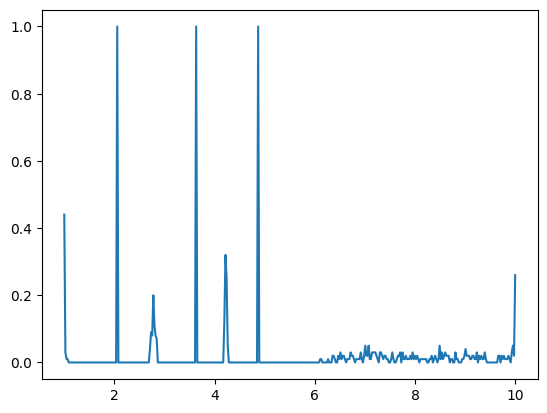

In [130]:
plt.plot(X,part2_total)

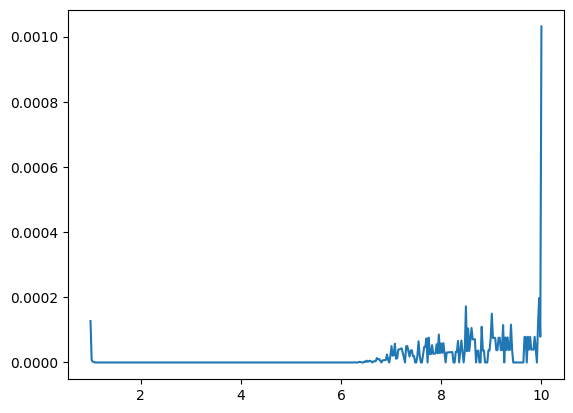

In [132]:
plt.plot(X,part1_total*part2_total)

In [106]:
L = np.linalg.cholesky(var_temp)
Z = np.random.normal(size = 401)
aa = np.dot(L,Z)
aa.shape

(401,)

In [114]:
mean_temp = mean_temp.reshape(-1,)

In [115]:
(aa+mean_temp).shape

(401,)

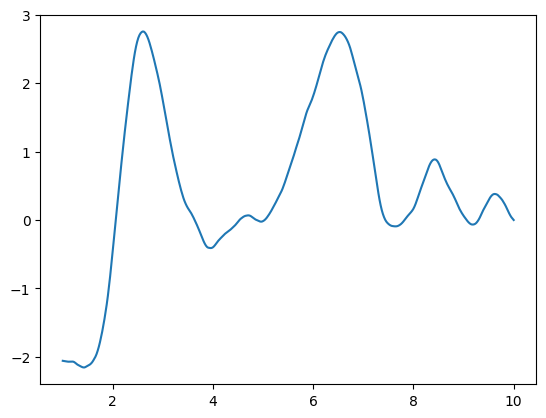

In [109]:
plt.plot(X,aa)

In [86]:
np.random.seed(exp) 
a = np.random.multivariate_normal(np.array([2]).reshape(-1,), np.array([[4]]), size=1)
b = np.random.multivariate_normal(np.array([3]).reshape(-1,), np.array([[9]]), size=1)
print((a-2)/2)
print((b-3)/3)

[[1.76405235]]
[[0.40015721]]


In [83]:
np.random.multivariate_normal(np.array([3]).reshape(-1,), np.array([[9]]), size=1)

array([[3.44506635]])

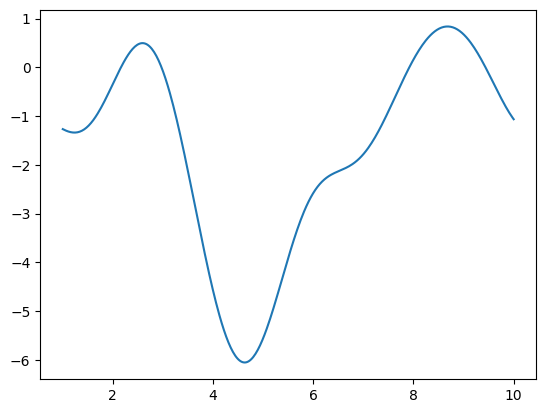

In [66]:
plt.plot(X,sample)

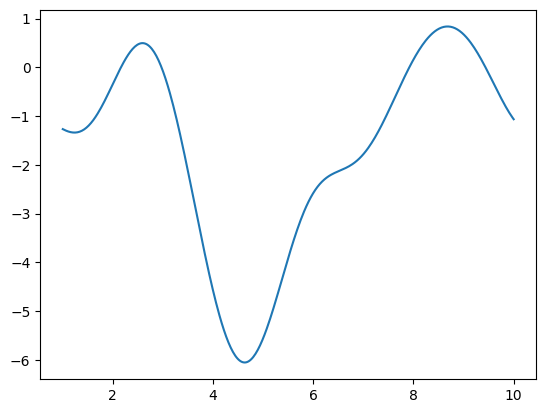

In [69]:
plt.plot(X,sample)

In [35]:
var[var<=0]=0.00001

In [36]:
var

array([[4.78002921e+00, 4.69974161e+00, 4.61684236e+00, ...,
        1.00000000e-05, 1.00000000e-05, 1.00000000e-05],
       [4.69974161e+00, 4.62170744e+00, 4.54106881e+00, ...,
        1.00000000e-05, 1.00000000e-05, 1.00000000e-05],
       [4.61684236e+00, 4.54106881e+00, 4.46270125e+00, ...,
        1.00000000e-05, 1.00000000e-05, 1.00000000e-05],
       ...,
       [1.00000000e-05, 1.00000000e-05, 1.00000000e-05, ...,
        9.99999974e+00, 9.99824210e+00, 9.99297100e+00],
       [1.00000000e-05, 1.00000000e-05, 1.00000000e-05, ...,
        9.99824210e+00, 9.99999978e+00, 9.99824214e+00],
       [1.00000000e-05, 1.00000000e-05, 1.00000000e-05, ...,
        9.99297100e+00, 9.99824214e+00, 9.99999981e+00]])

In [37]:
np.linalg.cholesky(var)

LinAlgError: Matrix is not positive definite

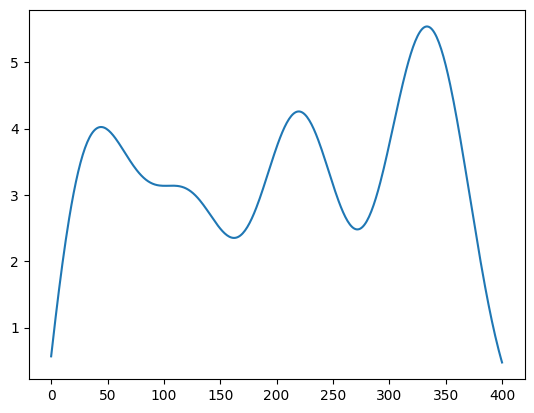

In [28]:
plt.plot(sample)

In [93]:
kernel = GPy.kern.Matern52(input_dim=1,variance=10,lengthscale=1.2)

In [94]:
kernel

Mat52.,value,constraints,priors
variance,10.0,+ve,
lengthscale,1.2,+ve,


In [18]:
var[0]

array([ 4.78002921e+00,  4.69974161e+00,  4.61684236e+00,  4.53141590e+00,
        4.44355068e+00,  4.35333907e+00,  4.26087724e+00,  4.16626496e+00,
        4.06960548e+00,  3.97100535e+00,  3.87057426e+00,  3.76842487e+00,
        3.66467258e+00,  3.55943539e+00,  3.45283367e+00,  3.34498996e+00,
        3.23602875e+00,  3.12607630e+00,  3.01526035e+00,  2.90370999e+00,
        2.79155532e+00,  2.67892733e+00,  2.56595758e+00,  2.45277801e+00,
        2.33952068e+00,  2.22631755e+00,  2.11330024e+00,  2.00059976e+00,
        1.88834632e+00,  1.77666905e+00,  1.66569582e+00,  1.55555293e+00,
        1.44636497e+00,  1.33825452e+00,  1.23134198e+00,  1.12574532e+00,
        1.02157989e+00,  9.18958216e-01,  8.17989782e-01,  7.18780853e-01,
        6.21434285e-01,  5.26049347e-01,  4.32721550e-01,  3.41542490e-01,
        2.52599687e-01,  1.65976448e-01,  8.17517282e-02,  8.14392553e-09,
       -7.92088226e-02, -1.55809570e-01, -2.29741831e-01, -3.00950077e-01,
       -3.69383727e-01, -

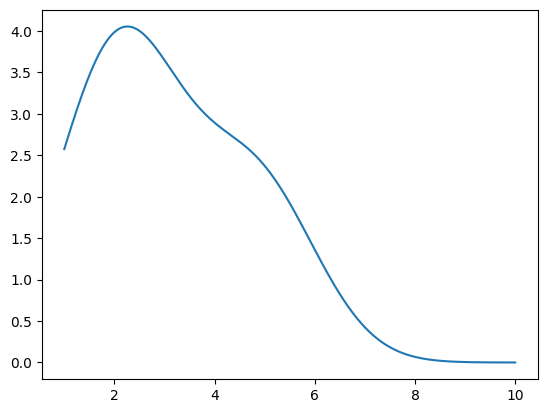

In [12]:
plt.plot(X,mean)

In [15]:
var.shape

(401, 401)

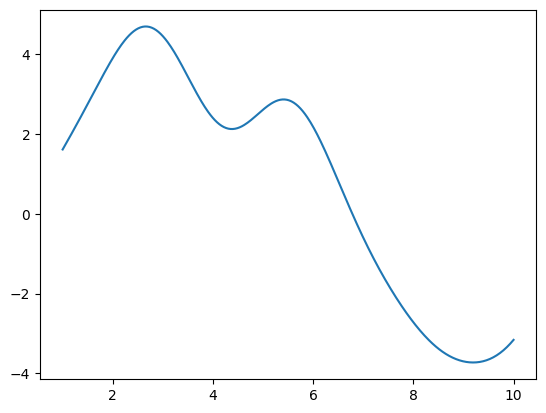

In [7]:
plt.plot(X,Y)